**This notebook evaluates the effect of image augmentation using the same CNN architecture from the baseline model.**

Steps:

- Augmentations (random flip, rotation, zoom) were applied using Keras layers.

- The augmented model was trained for 10 epochs on the same 224×224 dataset.

- Learning curves were plotted for comparison with the non-augmented version.

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Path and settings
subset_dir = "/Users/lauratm/Downloads/archive/subset_224x224"
image_size = (224, 224)
batch_size = 10


In [46]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
], name="data_augmentation")


In [48]:
train_ds = image_dataset_from_directory(
    subset_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    subset_dir,
    validation_split=0.6,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names


Found 1568 files belonging to 7 classes.
Using 1255 files for training.
Found 1568 files belonging to 7 classes.
Using 940 files for validation.


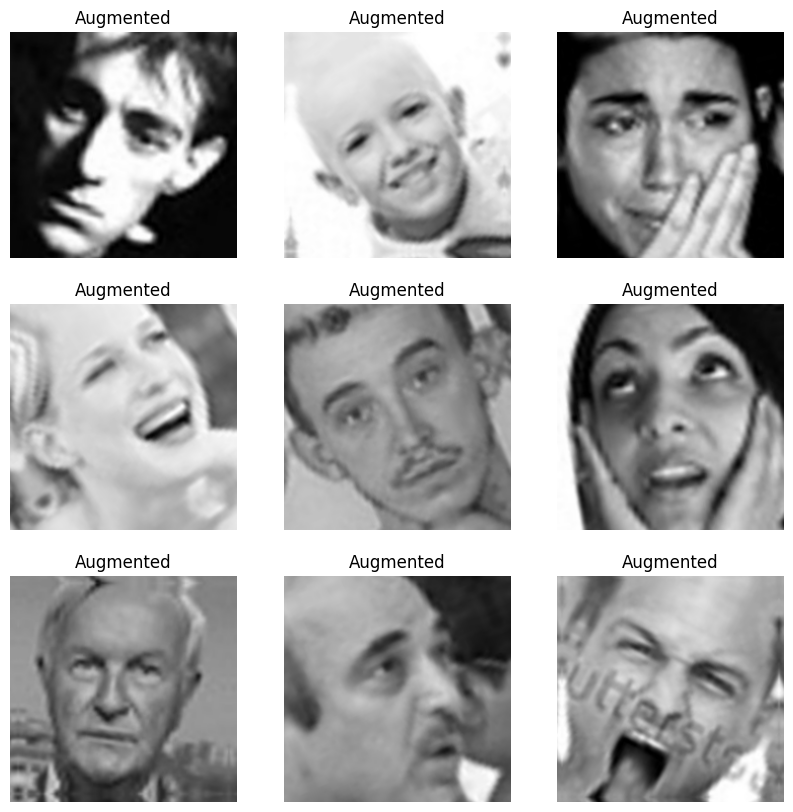

In [50]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    augmented_images = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title("Augmented")
        plt.axis("off")


In [52]:
model_aug = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])


In [54]:
model_aug.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_aug = model_aug.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.1726 - loss: 2.7761 - val_accuracy: 0.1915 - val_loss: 1.9403
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.1562 - loss: 1.9407 - val_accuracy: 0.1777 - val_loss: 1.9367
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.1705 - loss: 1.9334 - val_accuracy: 0.1862 - val_loss: 1.9290
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.1702 - loss: 1.9354 - val_accuracy: 0.1766 - val_loss: 1.9274
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.1674 - loss: 1.9266 - val_accuracy: 0.1851 - val_loss: 1.9222
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.1615 - loss: 1.9240 - val_accuracy: 0.1840 - val_loss: 1.9184
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.1997 - loss: 1.9076 - val_accuracy: 0.2000 - val_loss: 1.9050
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.1930 - loss: 1

In [56]:
model_aug.save("baseline_model_with_augmentation.h5")


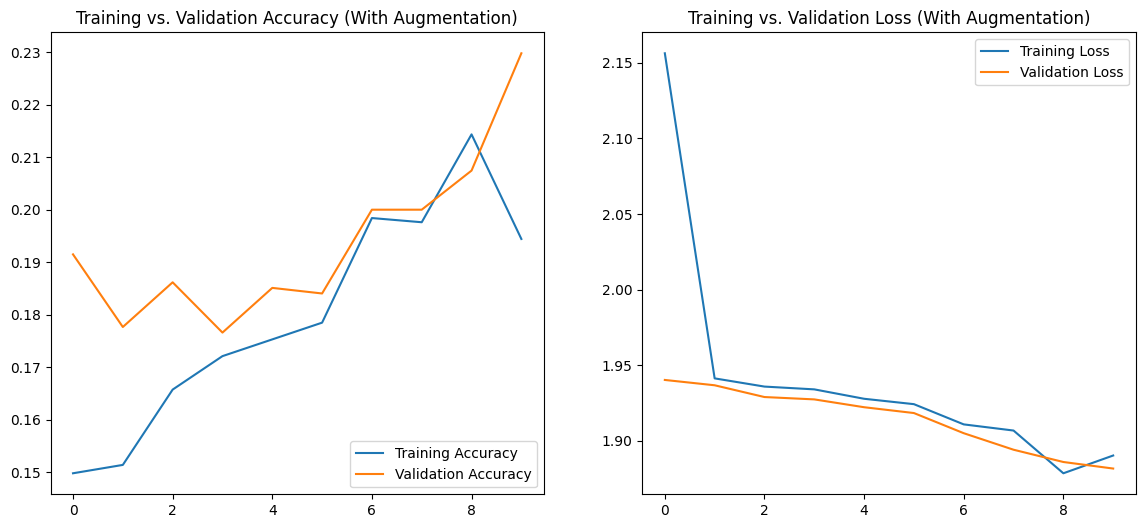

In [58]:
# Plot training and validation accuracy/loss
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs. Validation Accuracy (With Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs. Validation Loss (With Augmentation)')

plt.show()
